<a href="https://colab.research.google.com/github/NicholasTeixeira/alura-store-analise-01/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [61]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [10]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'


df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [22]:
df['Faturamento'] = df['Preço'] + df['Frete']
faturamento_por_loja = df.groupby('Loja')['Faturamento'].sum().round(2)
print(faturamento_por_loja)


Loja
Loja 1    1616347.09
Loja 2    1567773.22
Loja 3    1542047.69
Loja 4    1458253.46
Name: Faturamento, dtype: float64


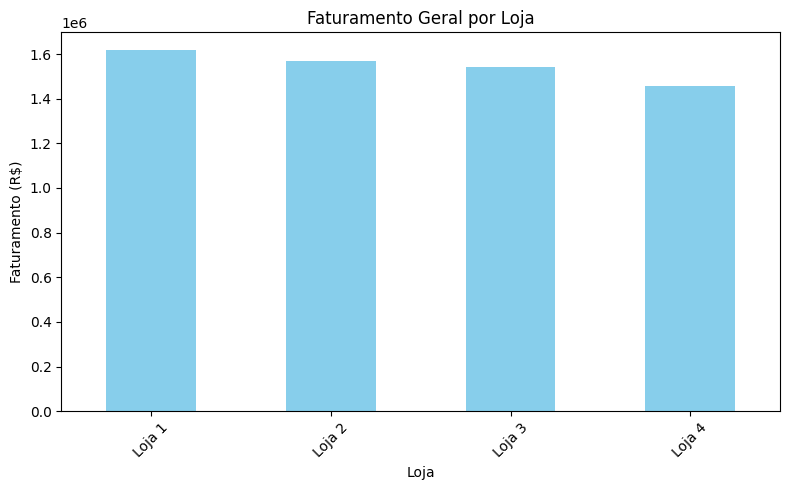

In [62]:
plt.figure(figsize=(8,5))
faturamento_por_loja.plot(kind='bar', color='skyblue')
plt.title('Faturamento Geral por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.tight_layout()

# 2. Vendas por Categoria


In [66]:
vendas_por_categoria = df.groupby('Categoria do Produto').agg(
    Quantidade_Vendas=('Categoria do Produto', 'count'),
    Faturamento_Total=('Faturamento', 'sum')
).reset_index()

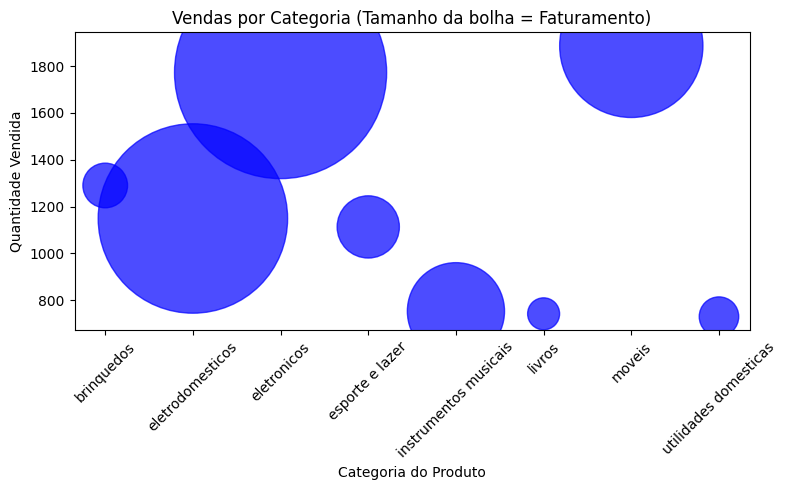

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(
    x=vendas_por_categoria.index,
    y=vendas_por_categoria['Quantidade_Vendas'],
    s=vendas_por_categoria['Faturamento_Total'] / 100,  # tamanho da bolha proporcional ao faturamento
    alpha=0.7,
    c='blue'
)

plt.xticks(vendas_por_categoria.index, vendas_por_categoria['Categoria do Produto'], rotation=45)
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade Vendida')
plt.title('Vendas por Categoria (Tamanho da bolha = Faturamento)')
plt.tight_layout()

In [67]:
print(tabela_categoria.round(2))

                       Quantidade_Vendas  Faturamento_Total
Categoria do Produto                                       
moveis                              1886         1064149.77
eletronicos                         1772         2332048.08
brinquedos                          1290          103502.36
eletrodomesticos                    1149         1860198.66
esporte e lazer                     1113          200891.94
instrumentos musicais                753          489701.48
livros                               742           53007.43
utilidades domesticas                730           80921.72


In [57]:
vendas_por_loja_categoria = (
    df.groupby(['Loja', 'Categoria do Produto'])
    .size()
    .reset_index(name='Quantidade_Vendas')
)

categoria_mais_vendida_por_loja = vendas_por_loja_categoria.loc[
    vendas_por_loja_categoria.groupby('Loja')['Quantidade_Vendas'].idxmax()
]

In [58]:
print(categoria_mais_vendida_por_loja[['Loja', 'Categoria do Produto', 'Quantidade_Vendas']])

      Loja Categoria do Produto  Quantidade_Vendas
6   Loja 1               moveis                465
14  Loja 2               moveis                442
22  Loja 3               moveis                499
30  Loja 4               moveis                480


# 3. Média de Avaliação das Lojas

In [34]:
media_avaliacao = df.groupby('Loja')['Avaliação da compra'].mean().rename('Média Avaliação')

In [36]:
for loja, valor in media_avaliacao.items():
    print(f"{loja}: {valor:.2f}")

Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [45]:
tabela_produto = df.groupby('Produto').agg(
    Quantidade_Vendas=('Produto', 'count'),
    Faturamento_Total=('Faturamento', 'sum')
).sort_values(by='Quantidade_Vendas', ascending=False)

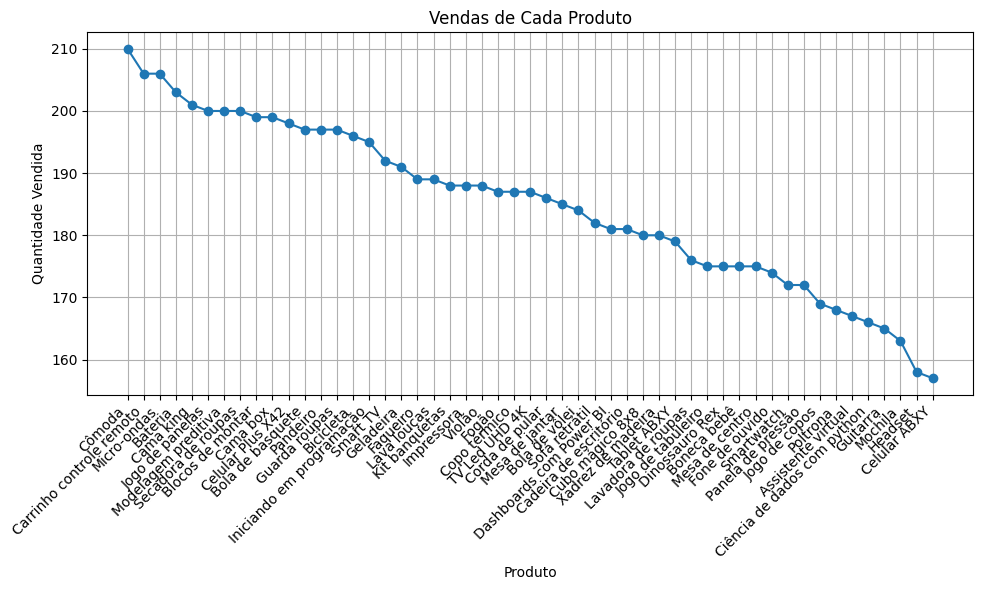

In [77]:
df = (tabela_produto)
vendas_por_produto = df.groupby('Produto')['Quantidade_Vendas'].sum().reset_index()
vendas_por_produto = vendas_por_produto.sort_values(by='Quantidade_Vendas', ascending=False)

plt.figure(figsize=(10,6))
plt.plot(vendas_por_produto['Produto'], vendas_por_produto['Quantidade_Vendas'], marker='o', linestyle='-')
plt.title('Vendas de Cada Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
print(tabela_produto.round(2))

                             Quantidade_Vendas  Faturamento_Total
Produto                                                          
Cômoda                                     210           82085.94
Carrinho controle remoto                   206           20771.82
Micro-ondas                                206          162401.26
Bateria                                    203          207574.06
Cama king                                  201          190711.11
Jogo de panelas                            200           42854.57
Modelagem preditiva                        200           17711.81
Secadora de roupas                         200          295243.32
Blocos de montar                           199            9509.11
Cama box                                   199          146147.63
Celular Plus X42                           198          563260.88
Bola de basquete                           197           13684.51
Pandeiro                                   197           17736.32
Guarda rou

In [59]:
vendas_por_loja_produto = (
    df.groupby(['Loja', 'Produto'])
    .size()
    .reset_index(name='Quantidade_Vendas')
)

produto_mais_vendido_por_loja = vendas_por_loja_produto.loc[
    vendas_por_loja_produto.groupby('Loja')['Quantidade_Vendas'].idxmax()
]


In [60]:
print(produto_mais_vendido_por_loja[['Loja', 'Produto', 'Quantidade_Vendas']])

       Loja                   Produto  Quantidade_Vendas
24   Loja 1             Guarda roupas                 60
79   Loja 2  Iniciando em programação                 65
134  Loja 3             Kit banquetas                 57
161  Loja 4                  Cama box                 62


# 5. Frete Médio por Loja


In [39]:
frete_medio = df.groupby('Loja')['Frete'].mean().rename('Frete Médio').round(2)

In [40]:
print(frete_medio)

Loja
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete Médio, dtype: float64


# Relatório Final - Análise das Lojas Alura Store

## Introdução

Neste relatório, foi realizado uma análise completa das quatro lojas da rede Alura Store para identificar qual delas deve ser vendida.  
Analisamos o faturamento total, categorias de produtos vendidas, avaliações dos clientes, produtos mais e menos vendidos, além do frete médio de cada loja.  
O objetivo é apoiar a decisão do Senhor João com base em dados objetivos e visualizações claras.

---

## Desenvolvimento

### 1. Faturamento Total por Loja

Apresento abaixo o faturamento total de cada loja:

| Loja   | Faturamento (R$) |
|--------|------------------|
| Loja 1 | 1.616.347,09     |
| Loja 2 | 1.567.773,22     |
| Loja 3 | 1.542.047,69     |
| Loja 4 | 1.458.253,46     |

Observa-se que a **Loja 4** apresenta o menor faturamento entre todas.

---

### 2. Categorias de Produtos mais e menos Vendidas

Foi analisado o faturamento e quantidade de vendas por categoria. As categorias que mais faturaram foram:

<!-- Coloque gráfico ou tabela de faturamento e vendas por categoria -->

| Categoria            | Faturamento (R$)  | Quantidade de Vendas |
|----------------------|-------------------|----------------------|
| eletronicos          | 2.332.048,08      | 1772                 |
| eletrodomesticos     | 1.860.198,66      | 1149                 |

As que mais venderam foram:

| Categoria            | Faturamento (R$)  | Quantidade de Vendas |
|----------------------|-------------------|----------------------|
| moveis           | 1.064.149,77      | 1.886 unidades           |
| eletronicos      | 2.332.048,08      | 1.772 unidades           |

Categorias menos vendidas demandam atenção para possível revisão no mix de produtos.

---

### 3. Média das Avaliações por Loja

A satisfação dos clientes é um indicador importante e as médias das avaliações foram:

| Loja   | Média da Avaliação |
|--------|--------------------|
| Loja 1 | 3.98                |
| Loja 2 | 4.04                |
| Loja 3 | 4.05               |
| Loja 4 | 4.00                |

As avaliações são muito semelhantes, indicando qualidade consistente entre as lojas.

---

### 4. Produtos Mais e Menos Vendidos

Foi identificado os produtos com maior e menor número de vendas:

- **Mais vendidos:** Cômoda | 210 unidades, Carrinho controle remoto e Microondas |  206 unidades
- **Menos vendidos:** Headset | 158 unidades, Celular ABXY | 157 unidades

---

### 5. Frete Médio por Loja

O frete médio impacta diretamente a decisão de compra dos clientes. Os valores médios foram:

| Loja   | Frete Médio (R$) |
|--------|------------------|
| Loja 1 | 34.69             |
| Loja 2 | 33.62             |
| Loja 3 | 33.07             |
| Loja 4 | 31.28             |

---

## Conclusão e Recomendação

Após a análise detalhada dos dados, a Loja 4 se destaca como a que deve ser vendida pelo Senhor João.  

Apesar de avaliações similares às outras lojas, a Loja 4 apresenta o menor faturamento e, dependendo do frete médio, pode estar em desvantagem competitiva. Além disso, sua performance em vendas por categoria e produtos menos vendidos indicam oportunidades de melhoria que podem ser custosas para o negócio.  

Assim, recomenda-se vender a Loja 4 e concentrar os investimentos nas demais unidades que apresentam maior retorno financeiro e desempenho consistente.